<a href="https://colab.research.google.com/github/Deepsphere-AI/DSAI_Python_Programming/blob/main/Unit-16/Python%20for%20Deep%20Learning/Program%20348-%20CSLAB_DEEP_LEARNING_LINEAR_SUPPORT_VECTOR_MACHINE_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step #100 A = [[-0.39498228]
 [ 0.5783261 ]] b = [[-0.3722273]]
Loss = [0.5832541]
Step #200 A = [[-0.270309  ]
 [ 0.11839049]] b = [[-0.4306273]]
Loss = [0.50941837]
Step #300 A = [[-0.1884244]
 [-0.2006171]] b = [[-0.47542724]]
Loss = [0.5514785]
Step #400 A = [[-0.11562097]
 [-0.4207428 ]] b = [[-0.5222275]]
Loss = [0.5623714]
Step #500 A = [[-0.0992741]
 [-0.5843288]] b = [[-0.5578274]]
Loss = [0.5995733]
Step #600 A = [[-0.09215964]
 [-0.7283597 ]] b = [[-0.5974274]]
Loss = [0.45713407]
Step #700 A = [[-0.0589883]
 [-0.8550599]] b = [[-0.6478276]]
Loss = [0.2295259]
Step #800 A = [[-0.04884712]
 [-0.9548553 ]] b = [[-0.6922277]]
Loss = [0.28973824]
Step #900 A = [[-0.03290959]
 [-1.0277492 ]] b = [[-0.7378278]]
Loss = [0.3768077]
Step #1000 A = [[-0.0074896]
 [-1.099881 ]] b = [[-0.791028]]
Loss = [0.40461534]
Step #1100 A = [[-0.01582094]
 [-1.1592348 ]] b = [[-0.83742803]]
Loss = [0.37550205]
Step #1200 A = [[-0.01600021]
 [-1.1994021 ]] b = [[-0.8830285]]
Loss = [0.29704535]
St

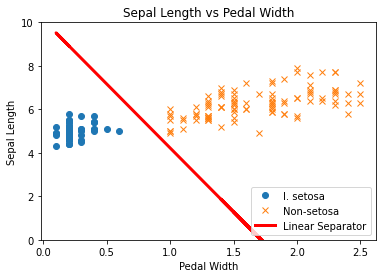

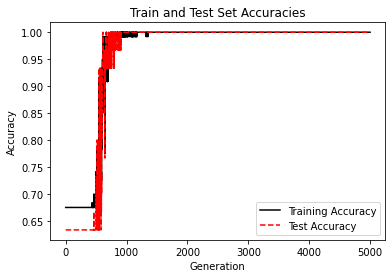

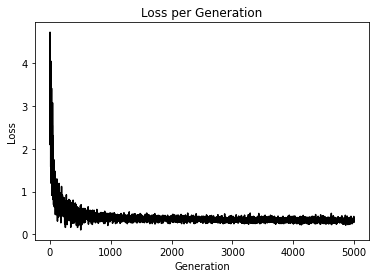

In [ ]:

# *********************************************************************************************************************
  
  # File Name 	:   CSLAB_DEEP_LEARNNG_LINEAR_SUPPORT_VECTOR_MACHINE_V1
  # Purpose 	:   A Program in Python for Linear Support Vector Machine - Deep Learning
  # Author	:   Deepsphere.ai
  # Reviewer 	:   Jothi Periasamy
  # Date 	:   28/10/2022
  # Version	:   1.0	
  
# ***********************************************************************************************************************

## Program Description : Program for Linear Support Vector Machine - Deep Learning in Python

## Python Development Environment & Runtime - Python, Anaconda, Tensorflow, Tensorboard

import matplotlib.pyplot as vAR_plt

%matplotlib inline

import numpy as vAR_np

import tensorflow.compat.v1 as vAR_tf

vAR_tf.disable_v2_behavior() 

from sklearn import datasets

vAR_sess = vAR_tf.Session()

vAR_CSLAB_iris = datasets.load_iris()
vAR_CSLAB_x_vals = vAR_np.array([[x[0], x[3]] for x in vAR_CSLAB_iris.data])
vAR_CSLAB_y_vals = vAR_np.array([1 if y==0 else -1 for y in vAR_CSLAB_iris.target])

vAR_CSLAB_train_indices = vAR_np.random.choice(len(vAR_CSLAB_x_vals), round(len(vAR_CSLAB_x_vals)*0.8), replace=False)

vAR_CSLAB_test_indices = vAR_np.array(list(set(range(len(vAR_CSLAB_x_vals))) - set(vAR_CSLAB_train_indices)))
vAR_CSLAB_x_vals_train = vAR_CSLAB_x_vals[vAR_CSLAB_train_indices]
vAR_CSLAB_x_vals_test = vAR_CSLAB_x_vals[vAR_CSLAB_test_indices]
vAR_CSLAB_y_vals_train = vAR_CSLAB_y_vals[vAR_CSLAB_train_indices]
vAR_CSLAB_y_vals_test = vAR_CSLAB_y_vals[vAR_CSLAB_test_indices]

vAR_CSLAB_batch_size = 100

vAR_CSLAB_x_data = vAR_tf.placeholder(shape=[None, 2], dtype=vAR_tf.float32)
vAR_CSLAB_y_target = vAR_tf.placeholder(shape=[None, 1], dtype=vAR_tf.float32)

vAR_CSLAB_A = vAR_tf.Variable(vAR_tf.random_normal(shape=[2,1]))
vAR_CSLAB_b = vAR_tf.Variable(vAR_tf.random_normal(shape=[1,1]))

vAR_CSLAB_model_output = vAR_tf.subtract(vAR_tf.matmul(vAR_CSLAB_x_data, vAR_CSLAB_A), vAR_CSLAB_b)

vAR_CSLAB_l2_norm = vAR_tf.reduce_sum(vAR_tf.square(vAR_CSLAB_A))

vAR_CSLAB_alpha = vAR_tf.constant([0.1])

vAR_CSLAB_classification_term = vAR_tf.reduce_mean(vAR_tf.maximum(0., vAR_tf.subtract(1., vAR_tf.multiply(vAR_CSLAB_model_output, vAR_CSLAB_y_target))))

vAR_CSLAB_loss = vAR_tf.add(vAR_CSLAB_classification_term, vAR_tf.multiply(vAR_CSLAB_alpha, vAR_CSLAB_l2_norm))

vAR_CSLAB_prediction = vAR_tf.sign(vAR_CSLAB_model_output)
vAR_CSLAB_accuracy = vAR_tf.reduce_mean(vAR_tf.cast(vAR_tf.equal(vAR_CSLAB_prediction, vAR_CSLAB_y_target), vAR_tf.float32))

vAR_CSLAB_my_opt = vAR_tf.train.GradientDescentOptimizer(0.01)
vAR_CSLAB_train_step = vAR_CSLAB_my_opt.minimize(vAR_CSLAB_loss)

vAR_CSLAB_init = vAR_tf.global_variables_initializer()
vAR_sess.run(vAR_CSLAB_init)

vAR_CSLAB_loss_vec = []
vAR_CSLAB_train_accuracy = []
vAR_CSLAB_test_accuracy = []
vAR_CSLAB_batch_size=25

for i in range(5000):
    vAR_CSLAB_rand_index = vAR_np.random.choice(len(vAR_CSLAB_x_vals_train), size=vAR_CSLAB_batch_size)
    vAR_CSLAB_rand_x = vAR_CSLAB_x_vals_train[vAR_CSLAB_rand_index]
    vAR_CSLAB_rand_y = vAR_np.transpose([vAR_CSLAB_y_vals_train[vAR_CSLAB_rand_index]])
    vAR_sess.run(vAR_CSLAB_train_step, feed_dict={vAR_CSLAB_x_data: vAR_CSLAB_rand_x, vAR_CSLAB_y_target: vAR_CSLAB_rand_y})
    
    vAR_CSLAB_temp_loss = vAR_sess.run(vAR_CSLAB_loss, feed_dict={vAR_CSLAB_x_data: vAR_CSLAB_rand_x, vAR_CSLAB_y_target: vAR_CSLAB_rand_y})
    vAR_CSLAB_loss_vec.append(vAR_CSLAB_temp_loss)
    
    vAR_CSLAB_train_acc_temp = vAR_sess.run(vAR_CSLAB_accuracy, feed_dict={vAR_CSLAB_x_data: vAR_CSLAB_x_vals_train, vAR_CSLAB_y_target: vAR_np.transpose([vAR_CSLAB_y_vals_train])})
    vAR_CSLAB_train_accuracy.append(vAR_CSLAB_train_acc_temp)
    
    vAR_CSLAB_test_acc_temp = vAR_sess.run(vAR_CSLAB_accuracy, feed_dict={vAR_CSLAB_x_data: vAR_CSLAB_x_vals_test, vAR_CSLAB_y_target: vAR_np.transpose([vAR_CSLAB_y_vals_test])})
    vAR_CSLAB_test_accuracy.append(vAR_CSLAB_test_acc_temp)
    
    if (i+1)%100==0:
        print('Step #' + str(i+1) + ' A = ' + str(vAR_sess.run(vAR_CSLAB_A)) + ' b = ' + str(vAR_sess.run(vAR_CSLAB_b)))
        print('Loss = ' + str(vAR_CSLAB_temp_loss))

[[vAR_CSLAB_a1], [vAR_CSLAB_a2]] = vAR_sess.run(vAR_CSLAB_A)
[[vAR_CSLAB_b]] = vAR_sess.run(vAR_CSLAB_b)
vAR_CSLAB_slope = -vAR_CSLAB_a2/vAR_CSLAB_a1
vAR_CSLAB_y_intercept = vAR_CSLAB_b/vAR_CSLAB_a1

vAR_CSLAB_x1_vals = [d[1] for d in vAR_CSLAB_x_vals]

vAR_CSLAB_best_fit = []
for i in vAR_CSLAB_x1_vals:
    vAR_CSLAB_best_fit.append(vAR_CSLAB_slope*i+vAR_CSLAB_y_intercept)

vAR_CSLAB_setosa_x = [d[1] for i,d in enumerate(vAR_CSLAB_x_vals) if vAR_CSLAB_y_vals[i]==1]
vAR_CSLAB_setosa_y = [d[0] for i,d in enumerate(vAR_CSLAB_x_vals) if vAR_CSLAB_y_vals[i]==1]
vAR_CSLAB_not_setosa_x = [d[1] for i,d in enumerate(vAR_CSLAB_x_vals) if vAR_CSLAB_y_vals[i]==-1]
vAR_CSLAB_not_setosa_y = [d[0] for i,d in enumerate(vAR_CSLAB_x_vals) if vAR_CSLAB_y_vals[i]==-1]

vAR_plt.plot(vAR_CSLAB_setosa_x, vAR_CSLAB_setosa_y, 'o', label='I. setosa')
vAR_plt.plot(vAR_CSLAB_not_setosa_x, vAR_CSLAB_not_setosa_y, 'x', label='Non-setosa')
vAR_plt.plot(vAR_CSLAB_x1_vals, vAR_CSLAB_best_fit, 'r-', label='Linear Separator', linewidth=3)
vAR_plt.ylim([0, 10])
vAR_plt.legend(loc='lower right')
vAR_plt.title('Sepal Length vs Pedal Width')
vAR_plt.xlabel('Pedal Width')
vAR_plt.ylabel('Sepal Length')
vAR_plt.show()

vAR_plt.plot(vAR_CSLAB_train_accuracy, 'k-', label='Training Accuracy')
vAR_plt.plot(vAR_CSLAB_test_accuracy, 'r--', label='Test Accuracy')
vAR_plt.title('Train and Test Set Accuracies')
vAR_plt.xlabel('Generation')
vAR_plt.ylabel('Accuracy')
vAR_plt.legend(loc='lower right')
vAR_plt.show()

vAR_plt.plot(vAR_CSLAB_loss_vec, 'k-')
vAR_plt.title('Loss per Generation')
vAR_plt.xlabel('Generation')
vAR_plt.ylabel('Loss')
vAR_plt.show()
    
# ****************************************************************************************************************************
#   Disclaimer.

# We are providing this code block strictly for learning and researching, this is not a production
# ready code. We have no liability on this particular code under any circumstances; users should use
# this code on their own risk. All software, hardware and othr products that are referenced in these 
# materials belong to the respective vendor who developed or who owns this product.

# ****************************************************************************************************************************
  

**Code Explanation**

The code is a TensorFlow implementation of the support vector machine (SVM) algorithm for binary classification.

In the beginning of the code, we import the required libraries and modules:

matplotlib.pyplot is imported as vAR_plt, and the %matplotlib inline line makes sure that the plots are displayed inline in the Jupyter Notebook.

numpy is imported as vAR_np and is used for numerical operations.

tensorflow.compat.v1 is imported as vAR_tf and is used for building and training the machine learning model.

sklearn.datasets is used to load the iris dataset, which will be used for training the SVM.

Next, the iris dataset is loaded using vAR_CSLAB_iris = datasets.load_iris() and the first and fourth features of the dataset are selected to be the input data vAR_CSLAB_x_vals, which are then split into training and testing datasets using vAR_CSLAB_train_indices and vAR_CSLAB_test_indices.

The target labels, stored in vAR_CSLAB_y_vals, are transformed into a binary classification problem by converting them into 1 for class 0 and -1 for the rest.

A TensorFlow computation graph is then built using placeholders, variables, operations, and loss functions:

A TensorFlow computation graph is then built using placeholders, variables, operations, and loss functions:

vAR_CSLAB_x_data and vAR_CSLAB_y_target are placeholders that will hold the input and target data.

vAR_CSLAB_A and vAR_CSLAB_b are variables that represent the weights and biases of the SVM model, initialized with random normal values.

The model output is computed using vAR_tf.subtract(vAR_tf.matmul(vAR_CSLAB_x_data, vAR_CSLAB_A), vAR_CSLAB_b) and is stored in vAR_CSLAB_model_output.

The loss function is defined as the combination of the classification term and the regularization term. The classification term, vAR_CSLAB_classification_term, is the mean of the hinge loss, which penalizes misclassified points. The regularization term, vAR_CSLAB_l2_norm, is the L2-norm of the weights, used to prevent overfitting.

vAR_CSLAB_prediction is a tensor that holds the predicted class labels and is computed using the vAR_tf.sign operation.

The accuracy of the model is computed using vAR_tf.reduce_mean(vAR_tf.cast(vAR_tf.equal(vAR_CSLAB_prediction, vAR_CSLAB_y_target), vAR_tf.float32)) and is stored in vAR_CSLAB_accuracy.

The model is trained using mini-batch gradient descent with a learning rate of 0.01 and a batch size of 25. The training process is repeated 5000 times and the loss and accuracy are recorded at each iteration and stored in the vAR_CSLAB_loss_vec, vAR_CSLAB_train_accuracy, and vAR_CSLAB_test_accuracy lists.